In [1]:
#importing libraries
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
#For removing warnings
warnings.filterwarnings('ignore')

In [3]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Defining Forward Pass and Back Propogation Algorithm
def forwardPass(trainingX,w1,w2):
    temp1 = np.matmul(trainingX,w1)
    z1 = sigmoid(temp1)
    
    length = len(z1)
    p = np.ones((length,1))
    z1 = np.concatenate((p,z1),axis = 1)
    
    temp2 = np.matmul(z1,w2)
    z2 = sigmoid(temp2)
    
    return temp1,z1,temp2,z2

def backProp(temp2,z0,z1,z2,Y):
    df2 = z2 - Y
    Delta2 = np.matmul(np.transpose(z1),df2)
    df1 = np.dot(df2,np.transpose(w2[1:,:]))*sigmoid(temp1)*(1-sigmoid(temp1))
    Delta1 = np.matmul(np.transpose(z0),df1)
    
    return df2,Delta1,Delta2

def weightUpdate(Delta1,Delta2,alpha,m,w1,w2):
    delw1 = alpha*(1/m)*Delta1
    w1 = w1 - delw1
    delw2 = alpha*(1/m)*Delta2 
    w2 = w2 - delw2
    return w1,w2

In [5]:
#Function to predict result
def predictionFunc(testingX,w1,w2):
    temp1,z1,temp2,z2 = forwardPass(testingX,w1,w2)
    return z2    

In [6]:
# Training DATA
trainingX = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
trainingY = np.array([[1],[0],[0],[1]])

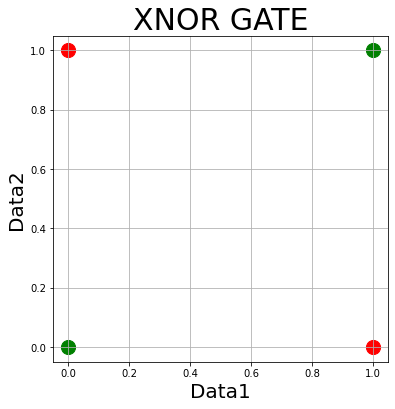

In [7]:
# XNOR by graph plotting
area = 200
fig = plt.figure(figsize=(6,6))
plt.title('XNOR GATE',fontsize = 30)
temp = fig.add_subplot(111)

temp.scatter(0,0, s = area , c='g', label = "Class 1")
temp.scatter(0,1, s = area , c='r', label = "Class 0")
temp.scatter(1,0, s = area , c='r', label = "Class 0")
temp.scatter(1,1, s = area , c='g', label = "Class 1")
plt.xlabel('Data1',fontsize = 20)
plt.ylabel('Data2',fontsize = 20)
plt.grid()
plt.show()

In [8]:
# PART 1: TRAINING

In [9]:
w1 = np.random.randn(3,5)
w2 = np.random.randn(6,1)
alpha = 0.05
errorList = []
epochs = 10000

In [10]:
m = len(trainingX)

for i in range(epochs):
    temp1,z1,temp2,z2 = forwardPass(trainingX,w1,w2)
    df2,Delta1,Delta2 = backProp(temp2,trainingX,z1,z2,trainingY)
    w1,w2 = weightUpdate(Delta1,Delta2,alpha,m,w1,w2)
    err = np.mean(np.abs(df2))
    errorList.append(err)    

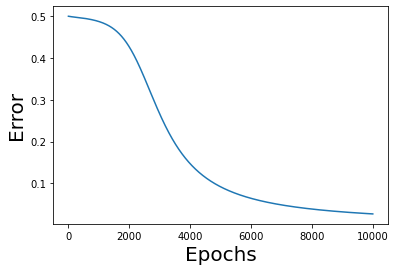

In [11]:
z3 = predictionFunc(trainingX,w1,w2)
plt.plot(errorList)
plt.xlabel('Epochs',fontsize = 20)
plt.ylabel('Error',fontsize = 20)
plt.show()

In [12]:
# PART 2: TESTING

In [13]:
testingX = np.array([[1,0,0.03],[1,0,0.99],[1,1,0],[1,1,0.2],[1,0.4,0.6],[1,0.9,0.85],[1,1,1],[1,0,0],[1,0.5,0.5]])
testingY = np.array([[1.],[0.],[0.],[0.],[1.],[1.],[1.],[1.],[1.]])   

In [14]:
predictedY = predictionFunc(testingX,w1,w2)
print("Predicted Values:")
print(np.round(predictedY))
print("Actual Values:")
print(testingY)

Predicted Values:
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Actual Values:
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [15]:
total = len(predictedY)
correct = 0

for i in range(len(predictedY)):

    print("\nx1 - ",testingX[i][1],",x2 - ",testingX[i][2])
    print("Predicted - ",np.round(predictedY[i]),",Actual - ",testingY[i])

    if ( np.round(predictedY[i]) == testingY[i] ):
        correct = correct + 1

print ( "\nAccuracy - ", correct/total)


x1 -  0.0 ,x2 -  0.03
Predicted -  [1.] ,Actual -  [1.]

x1 -  0.0 ,x2 -  0.99
Predicted -  [0.] ,Actual -  [0.]

x1 -  1.0 ,x2 -  0.0
Predicted -  [0.] ,Actual -  [0.]

x1 -  1.0 ,x2 -  0.2
Predicted -  [0.] ,Actual -  [0.]

x1 -  0.4 ,x2 -  0.6
Predicted -  [1.] ,Actual -  [1.]

x1 -  0.9 ,x2 -  0.85
Predicted -  [1.] ,Actual -  [1.]

x1 -  1.0 ,x2 -  1.0
Predicted -  [1.] ,Actual -  [1.]

x1 -  0.0 ,x2 -  0.0
Predicted -  [1.] ,Actual -  [1.]

x1 -  0.5 ,x2 -  0.5
Predicted -  [1.] ,Actual -  [1.]

Accuracy -  1.0
